# Data preparation and Exploration

Prepare data from [restaurant inspections](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59) Note: Exported as csv.

Make some descriptives for the data set.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the complete data set
rest_insp = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', sep=',',engine='python')
# separate columns specific to 
# 1. Inspection
# 2. Restaurant
# 3. Violations

In [3]:
rest_insp.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41020745,L'YBANE BAR RESTAURANT,MANHATTAN,709,8 AVENUE,10036.0,2125822012,Moroccan,07/11/2014,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7.0,A,07/11/2014,08/07/2017,Cycle Inspection / Initial Inspection
1,41473636,HECHO EN DUMBO,MANHATTAN,354,BOWERY,10012.0,2129374245,Mexican,08/19/2015,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,21.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection
2,50002455,CAFE PAULETTE,BROOKLYN,136,DEKALB AVE,11217.0,7186942044,CafÃ©/Coffee/Tea,07/28/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,22.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection
3,50016803,HUA RONG,QUEENS,8323,BROADWAY,11373.0,7187601027,Chinese,07/26/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,36.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection
4,50041974,SWEETHAUS,BROOKLYN,135,METROPOLITAN AVE,11249.0,7187106627,CafÃ©/Coffee/Tea,06/06/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,06/06/2017,08/07/2017,Cycle Inspection / Re-inspection


In [4]:
len(rest_insp)

403722

In [5]:
# creates a new column based on inspection date
rest_insp['date'] = pd.to_datetime(rest_insp['INSPECTION DATE'])

In [7]:
# separate year, month, day
rest_insp['year'] = rest_insp['date'].dt.year
rest_insp['month'] = rest_insp['date'].dt.month
rest_insp['day'] = rest_insp['date'].dt.day

## Basic Description for data
Some descriptives, complete table

In [8]:
# years in the data
rest_insp['year'].value_counts()

2015    118301
2016    117639
2014     87085
2017     71404
2013      8181
1900      1095
2012        15
2011         2
Name: year, dtype: int64

Here, I only consider 4 years, with max observations

In [9]:
# Keep only 2014 to 2017
inspections = pd.DataFrame(rest_insp[(rest_insp['year']>=2014) & (rest_insp['year']<=2017)])

In [21]:
len(inspections)

394429

In [10]:
# May or not be too relevant?
inspections['CUISINE DESCRIPTION'].value_counts()

American                                                            89681
Chinese                                                             41982
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    19014
Pizza                                                               18633
Italian                                                             17552
CafÃ©/Coffee/Tea                                                    15275
Mexican                                                             14886
Japanese                                                            14340
Caribbean                                                           12925
Bakery                                                              11760
Spanish                                                             11719
Pizza/Italian                                                        8617
Asian                                                                6181
Indian                                

In [12]:
#
inspections['GRADE'].value_counts()
# perhaps, it makes sense to try to predict only low values
# or changes in value, specially from higher to lower

A                 152796
B                  28416
C                   7010
Not Yet Graded      2074
Z                   1495
P                   1337
Name: GRADE, dtype: int64

In [13]:
inspections['CRITICAL FLAG'].value_counts()

Critical          217562
Not Critical      171128
Not Applicable      5739
Name: CRITICAL FLAG, dtype: int64

In [14]:
inspections['VIOLATION CODE'].value_counts()

10F    55299
08A    39441
02G    27620
04L    27587
06D    25790
06C    25658
10B    21864
02B    19517
04N    18930
04M     8853
04H     8810
06E     8707
06F     7616
06A     7272
04A     7253
10H     6328
09C     4879
08C     4783
15L     4467
02H     4126
10I     3859
09B     3633
05D     3379
04C     3148
22C     3031
16B     2988
04J     2935
10A     2693
10E     2621
06B     2609
       ...  
04F       87
18D       86
05A       76
22E       72
10G       56
05B       54
15T       52
07A       39
02D       38
22G       33
04B       29
18C       20
15E       17
03D       16
03E       15
02F        9
03G        9
06I        8
04I        7
06H        7
16F        6
15A        5
18B        5
02E        4
04G        4
03F        4
20B        4
02J        3
15H        1
05I        1
Name: VIOLATION CODE, Length: 97, dtype: int64

In [15]:

inspections['VIOLATION DESCRIPTION'].value_counts()


Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      55299
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   39441
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.                                                                                                                                                                   27620
Evidence of mice or live mice present in facility's food and/or non-food areas.                        

In [17]:
# PERHASP it would be easy to look at values with these problems
inspections['ACTION'].value_counts()

Violations were cited in the following area(s).                                                                                        376684
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      9008
No violations were recorded at the time of this inspection.                                                                              5318
Establishment re-opened by DOHMH                                                                                                         2643
Establishment re-closed by DOHMH                                                                                                          776
Name: ACTION, dtype: int64

In [18]:
inspections['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          227856
Cycle Inspection / Re-inspection                                98600
Pre-permit (Operational) / Initial Inspection                   24092
Pre-permit (Operational) / Re-inspection                        10619
Administrative Miscellaneous / Initial Inspection                7841
Smoke-Free Air Act / Initial Inspection                          4148
Pre-permit (Non-operational) / Initial Inspection                3899
Cycle Inspection / Reopening Inspection                          3142
Trans Fat / Initial Inspection                                   2899
Administrative Miscellaneous / Re-inspection                     2751
Smoke-Free Air Act / Re-inspection                               1611
Cycle Inspection / Compliance Inspection                         1434
Trans Fat / Re-inspection                                        1187
Inter-Agency Task Force / Initial Inspection                     1145
Pre-permit (Operatio

In [19]:
inspections.to_csv('inspections.csv')

## Restart point
From here I can start working from the inspection data, this only includes information for years
2014 to 2017 (this is being updated)

In [6]:
inspections = pd.read_csv('inspections.csv', sep=',',engine='python')

In [20]:
inspections.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,date,year,month,day
0,41020745,L'YBANE BAR RESTAURANT,MANHATTAN,709,8 AVENUE,10036.0,2125822012,Moroccan,07/11/2014,Violations were cited in the following area(s).,...,Not Critical,7.0,A,07/11/2014,08/07/2017,Cycle Inspection / Initial Inspection,2014-07-11,2014,7,11
1,41473636,HECHO EN DUMBO,MANHATTAN,354,BOWERY,10012.0,2129374245,Mexican,08/19/2015,Violations were cited in the following area(s).,...,Not Critical,21.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2015-08-19,2015,8,19
2,50002455,CAFE PAULETTE,BROOKLYN,136,DEKALB AVE,11217.0,7186942044,CafÃ©/Coffee/Tea,07/28/2014,Violations were cited in the following area(s).,...,Critical,22.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2014-07-28,2014,7,28
3,50016803,HUA RONG,QUEENS,8323,BROADWAY,11373.0,7187601027,Chinese,07/26/2017,Violations were cited in the following area(s).,...,Critical,36.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2017-07-26,2017,7,26
4,50041974,SWEETHAUS,BROOKLYN,135,METROPOLITAN AVE,11249.0,7187106627,CafÃ©/Coffee/Tea,06/06/2017,Violations were cited in the following area(s).,...,Not Critical,9.0,A,06/06/2017,08/07/2017,Cycle Inspection / Re-inspection,2017-06-06,2017,6,6


In [22]:
list(inspections)
#inspections['ACTION'].value_counts()

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE',
 'date',
 'year',
 'month',
 'day']

### Separate tables 
To work only by type of inspection


In [23]:
# Normalization tables # Violations # and reshape to restaurant and inspection (date)
violations_vars = ['CAMIS', 'VIOLATION CODE', 'date', 'year', 'month','day']
violations_repeated = inspections[violations_vars]
#CI_restaurants = CI_restaurants_repeated.duplicated(subset=None, keep='first')
violationsDF = violations_repeated.drop_duplicates(subset=None, keep='first', inplace=False)
violationsDF.head()
#? 'ACTION',
# , to traspose for presence in a inspection
# 'VIOLATION DESCRIPTION', table to relate with violation Code 
# 'CRITICAL FLAG', table to relate with violation Code and Violation Description

,CAMIS,VIOLATION CODE,date,year,month,day
0,41020745,10B,2014-07-11,2014,7,11
1,41473636,10E,2015-08-19,2015,8,19
2,50002455,04H,2014-07-28,2014,7,28
3,50016803,02G,2017-07-26,2017,7,26
4,50041974,10F,2017-06-06,2017,6,6


In [24]:
# Normalization tables # Inspections
inspection_vars = ['CAMIS', 'INSPECTION DATE', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'date', 'year', 'month','day']
inspections_repeated = inspections[inspection_vars]
#CI_restaurants = CI_restaurants_repeated.duplicated(subset=None, keep='first')
inspectionsDF = inspections_repeated.drop_duplicates(subset=None, keep='first', inplace=False)
inspectionsDF.head()


,CAMIS,INSPECTION DATE,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,date,year,month,day
0,41020745,07/11/2014,7.0,A,07/11/2014,08/07/2017,Cycle Inspection / Initial Inspection,2014-07-11,2014,7,11
1,41473636,08/19/2015,21.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2015-08-19,2015,8,19
2,50002455,07/28/2014,22.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2014-07-28,2014,7,28
3,50016803,07/26/2017,36.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2017-07-26,2017,7,26
4,50041974,06/06/2017,9.0,A,06/06/2017,08/07/2017,Cycle Inspection / Re-inspection,2017-06-06,2017,6,6


In [25]:
# Normalization tables
restaurant_vars = ['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET','ZIPCODE','PHONE','CUISINE DESCRIPTION']
restaurants_repeated = inspections[restaurant_vars]
#CI_restaurants = CI_restaurants_repeated.duplicated(subset=None, keep='first')
restaurantsDF = restaurants_repeated.drop_duplicates(subset=None, keep='first', inplace=False)
restaurantsDF.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION
0,41020745,L'YBANE BAR RESTAURANT,MANHATTAN,709,8 AVENUE,10036.0,2125822012,Moroccan
1,41473636,HECHO EN DUMBO,MANHATTAN,354,BOWERY,10012.0,2129374245,Mexican
2,50002455,CAFE PAULETTE,BROOKLYN,136,DEKALB AVE,11217.0,7186942044,CafÃ©/Coffee/Tea
3,50016803,HUA RONG,QUEENS,8323,BROADWAY,11373.0,7187601027,Chinese
4,50041974,SWEETHAUS,BROOKLYN,135,METROPOLITAN AVE,11249.0,7187106627,CafÃ©/Coffee/Tea


In [26]:
len(restaurantsDF)
restaurantsDF.to_csv('restaurantsTable.csv')

In [27]:
len(inspectionsDF)
inspectionsDF.to_csv('inspectionsTable.csv')

In [28]:
len(violationsDF)
violationsDF.to_csv('violationsTable.csv')

Make a reshape to get by inspection the violations present

In [35]:
# Testing with one restaurant
#cy_some = pd.DataFrame(CycleInspections[CycleInspections['CAMIS'] == 50043431])
#violationsDF.sort_values('date').head()
# hold presence of a violation
df_multi = violationsDF[['CAMIS','date','VIOLATION CODE']]
df_multi['violation_presence'] = 1
df_multi.head()

/home/chen/.conda/envs/tensorflow11/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CAMIS,date,VIOLATION CODE,violation_presence
0,41020745,2014-07-11,10B,1
1,41473636,2015-08-19,10E,1
2,50002455,2014-07-28,04H,1
3,50016803,2017-07-26,02G,1
4,50041974,2017-06-06,10F,1


In [36]:
df_multi.set_index(['date', 'CAMIS'])
df_multi = df_multi.pivot_table(index = ['CAMIS','date'], columns='VIOLATION CODE')
df_multi.head()

violation_presence                                       \
VIOLATION CODE                     02A 02B 02C 02D 02E 02F  02G 02H 02I 02J   
CAMIS    date                                                                 
30075445 2015-02-09                NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN   
         2016-02-18                NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN   
         2017-05-18                NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN   
30112340 2014-07-01                NaN NaN NaN NaN NaN NaN  1.0 NaN NaN NaN   
         2014-11-13                NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN   

                    ...                                          
VIOLATION CODE      ... 20B 20D 20E 20F 22A 22B 22C 22E 22F 22G  
CAMIS    date       ...                                          
30075445 2015-02-09 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
         2016-02-18 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
         2017-05-18 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
30112340 2014-07-01 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
         2014-11-13 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 97 columns]

In [33]:
df_multi.to_csv('multiTable.csv')
len(df_multi)


133172

## Explore only data from Cycle Inspection
To predict the result from cycle inspection/Re-inspection  
From what has been seen in Initial Inspection

In [37]:

# Only Cycle Inspections
CycleInspections=pd.DataFrame(inspectionsDF[(inspectionsDF['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') | 
                                          (inspectionsDF['INSPECTION TYPE'] =='Cycle Inspection / Re-inspection')])

In [38]:
len(CycleInspections)

115020

In [41]:
# join Cycle Inspections with df_multi
agg_count = df_multi.groupby(['CAMIS', 'date']).agg(['count'])

In [42]:
agg_count.head()

violation_presence                                      \
                                   02A   02B   02C   02D   02E   02F   02G   
                                 count count count count count count count   
CAMIS    date                                                                
30075445 2015-02-09                  0     0     0     0     0     0     0   
         2016-02-18                  0     0     0     0     0     0     0   
         2017-05-18                  0     0     0     0     0     0     0   
30112340 2014-07-01                  0     0     0     0     0     0     1   
         2014-11-13                  0     0     0     0     0     0     0   

                                       ...                                 \
                      02H   02I   02J  ...    20B   20D   20E   20F   22A   
                    count count count  ...  count count count count count   
CAMIS    date                          ...                                  
30075445 2015-02-09     0     0     0  ...      0     0     0     0     0   
         2016-02-18     0     0     0  ...      0     0     0     0     0   
         2017-05-18     0     0     0  ...      0     0     0     0     0   
30112340 2014-07-01     0     0     0  ...      0     0     0     0     0   
         2014-11-13     0     0     0  ...      0     0     0     0     0   

                                                   
                      22B   22C   22E   22F   22G  
                    count count count count count  
CAMIS    date                                      
30075445 2015-02-09     0     0     0     0     0  
         2016-02-18     0     0     0     0     0  
         2017-05-18     0     0     0     0     0  
30112340 2014-07-01     0     0     0     0     0  
         2014-11-13     0     0     0     0     0  

[5 rows x 97 columns]

In [46]:
CycleInspections = CycleInspections.set_index(['date', 'CAMIS'])
CycleInspections.head()

,,INSPECTION DATE,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,year,month,day
date,CAMIS,,,,,,,,,
2014-07-11,41020745,07/11/2014,7.0,A,07/11/2014,08/07/2017,Cycle Inspection / Initial Inspection,2014,7,11
2015-08-19,41473636,08/19/2015,21.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2015,8,19
2014-07-28,50002455,07/28/2014,22.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2014,7,28
2017-07-26,50016803,07/26/2017,36.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2017,7,26
2017-06-06,50041974,06/06/2017,9.0,A,06/06/2017,08/07/2017,Cycle Inspection / Re-inspection,2017,6,6


In [48]:
CycleInsp_violationCount = pd.concat([CycleInspections, agg_count], axis=1, join_axes=[CycleInspections.index])
CycleInsp_violationCount.head()

,,INSPECTION DATE,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,year,month,day,"(violation_presence, 02A, count)",...,"(violation_presence, 20B, count)","(violation_presence, 20D, count)","(violation_presence, 20E, count)","(violation_presence, 20F, count)","(violation_presence, 22A, count)","(violation_presence, 22B, count)","(violation_presence, 22C, count)","(violation_presence, 22E, count)","(violation_presence, 22F, count)","(violation_presence, 22G, count)"
date,CAMIS,,,,,,,,,,,,,,,,,,,,,
2014-07-11,41020745,07/11/2014,7.0,A,07/11/2014,08/07/2017,Cycle Inspection / Initial Inspection,2014,7,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-19,41473636,08/19/2015,21.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2015,8,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-28,50002455,07/28/2014,22.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2014,7,28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-26,50016803,07/26/2017,36.0,NaN,NaN,08/07/2017,Cycle Inspection / Initial Inspection,2017,7,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-06,50041974,06/06/2017,9.0,A,06/06/2017,08/07/2017,Cycle Inspection / Re-inspection,2017,6,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
CycleInsp_violationCount.to_csv('CycleInsp_violationCountTable.csv')
CycleInspections.to_csv('CycleInspectionsTable.csv')

## ReStart point
From this point work on visualizations for the data with 
* Years 2014 to 2017
* Cycle Inspections
* Violations Reported

In [2]:
#CycleInspections = pd.read_csv('CycleInspections.csv', sep=',',engine='python')
CycleInsp_violationCount = pd.read_csv('CycleInsp_violationCountTable.csv', sep=',',engine='python')


In [50]:
CycleInsp_violCount2014 = CycleInsp_violationCount[CycleInsp_violationCount['year'] == 2014]


In [51]:
len(CycleInsp_violCount2014)

24678

In [53]:
CycleInsp_violCount2014.groupby(['CAMIS', 'date']).agg(['mean']).head()

SCORE  year month  day (violation_presence, 02A, count)  \
                     mean  mean  mean mean                             mean   
CAMIS    date                                                                 
30112340 2014-07-01  23.0  2014     7    1                              NaN   
         2014-11-13  14.0  2014    11   13                              NaN   
         2014-12-30   8.0  2014    12   30                              NaN   
30191841 2014-09-06   2.0  2014     9    6                              NaN   
40356151 2014-04-11  50.0  2014     4   11                              NaN   

                    (violation_presence, 02B, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                    (violation_presence, 02C, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                    (violation_presence, 02D, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                    (violation_presence, 02E, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                    (violation_presence, 02F, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                                  ...                 \
                                  ...                  
CAMIS    date                     ...                  
30112340 2014-07-01               ...                  
         2014-11-13               ...                  
         2014-12-30               ...                  
30191841 2014-09-06               ...                  
40356151 2014-04-11               ...                  

                    (violation_presence, 20B, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13                              NaN   
         2014-12-30                              NaN   
30191841 2014-09-06                              NaN   
40356151 2014-04-11                              NaN   

                    (violation_presence, 20D, count)  \
                                                mean   
CAMIS    date                                          
30112340 2014-07-01                              NaN   
         2014-11-13 

In [ ]:
#

# By day of the week?


In [54]:
# Month distribution
# First Inspection
CycleInsp_violCount2014['month'].value_counts()

12    3230
10    2742
9     2704
8     2631
6     2333
11    2227
7     2211
5     1850
4     1597
3     1361
2     1078
1      714
Name: month, dtype: int64

(array([ 1792.,  1361.,  1597.,  1850.,  2333.,  2211.,  2631.,  2704.,
         2742.,  5457.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

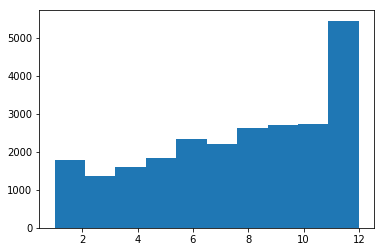

In [56]:
plt.hist(CycleInsp_violCount2014['month'])

In [58]:
# only initial inspections
CI_VC2014_initial = CycleInsp_violCount2014[CycleInsp_violCount2014['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection']


(array([ 1128.,   834.,   952.,  1180.,  1300.,  1297.,  1732.,  1633.,
         1734.,  3572.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

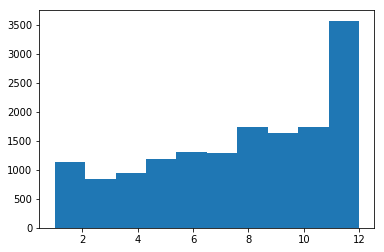

In [59]:
plt.hist(CI_VC2014_initial['month'])

In [60]:
CI_VC2014_reinsp = CycleInsp_violCount2014[CycleInsp_violCount2014['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection']


(array([  664.,   527.,   645.,   670.,  1033.,   914.,   899.,  1071.,
         1008.,  1885.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

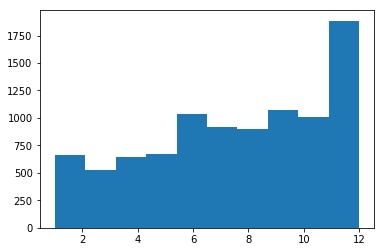

In [61]:
plt.hist(CI_VC2014_reinsp['month'])

Regardless of Inspection Type
December is the month with the highest inspection frequency


In [17]:
# Add restaurant Data


# Restaurant 
# CAMIS, BORO, DBA, 
# Code for Violations
#CI_restaurants = CI_restaurants_repeated.drop_duplicates(subset=None, keep='first', inplace=False)
#CI_restaurants.head()

# Inspections
# CAMIS, date (year, month, day) , INSPECTION TYPE, SCORE, GRADE, RECORD DATE
# Violations
# VIOLATION CODE, VIOLATION DESCRIPTION

In [18]:
CI_restaurants.head()

,CAMIS,BORO,DBA
0,41312955,QUEENS,RIPE JUICE BAR & GRILL
1,41601691,BROOKLYN,WAZA SUSHI
2,50043431,MANHATTAN,SEATTLE CAFE
3,50001580,STATEN ISLAND,CIRO PIZZA CAFE
4,41722020,BRONX,2 BROS PIZZA


In [ ]:
len(CI_restaurants)
#
#
#CI_restaurants_repeated.head()
#CI_restaurants.to_csv('CI_restaurants.csv')


In [32]:
CycleInspections['date'][(CycleInspections['DBA'] == 'SEATTLE CAFE') & (CycleInspections['BORO'] == 'QUEENS') ]

88157    2016-02-25
91145    2015-02-13
96696    2017-05-02
126780   2017-03-29
132349   2015-08-25
139140   2015-02-24
160327   2015-02-13
172257   2017-03-29
174390   2015-09-14
182326   2015-02-13
190151   2017-05-02
218412   2015-02-24
220206   2017-05-02
253064   2017-03-29
268994   2015-08-25
336187   2016-02-25
349623   2015-08-25
382440   2015-09-14
388612   2015-02-24
Name: date, dtype: datetime64[ns]

In [44]:
cy_some = pd.DataFrame(CycleInspections[CycleInspections['CAMIS'] == 50043431])

In [60]:
cy_some[['VIOLATION DESCRIPTION','SCORE','date','INSPECTION TYPE','ACTION']].sort_values('date')

,VIOLATION DESCRIPTION,SCORE,date,INSPECTION TYPE,ACTION
124825,Cold food item held above 41Ã‚Âº F (smoked fis...,19.0,2016-07-26,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
136948,"Sanitized equipment or utensil, including in-u...",19.0,2016-07-26,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
404115,Non-food contact surface improperly constructe...,19.0,2016-07-26,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
76844,"Food contact surface not properly washed, rins...",12.0,2016-08-25,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).
116190,Non-food contact surface improperly constructe...,12.0,2016-08-25,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).
285089,Wiping cloths soiled or not stored in sanitizi...,12.0,2016-08-25,Cycle Inspection / Re-inspection,Violations were cited in the following area(s).
3,Non-food contact surface improperly constructe...,35.0,2017-05-19,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
76623,Plumbing not properly installed or maintained;...,35.0,2017-05-19,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
146463,"Food contact surface not properly washed, rins...",35.0,2017-05-19,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).
164194,Facility not vermin proof. Harborage or condit...,35.0,2017-05-19,Cycle Inspection / Initial Inspection,Violations were cited in the following area(s).


In [30]:
len(CycleInspections['date'][CycleInspections['DBA'] == 'SEATTLE CAFE'])

35

In [48]:
cy_some.sort_values('date').head()
# Agregate by inspection date
# number of critical flags
# number of inspection NOtes?
# score is average(?)
# no change: boro, dba, street, zipcode, phone, cuisine description (by camis)
#            inspection date, action, grade, date, year, month, day
# only: camis, date (month, day, year), grade
# Aggregation of violation descriptions to grade?


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,date,year,month,day
124825,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,07/26/2016,Violations were cited in the following area(s).,...,Critical,19.0,NaN,NaN,07/15/2017,Cycle Inspection / Initial Inspection,2016-07-26,2016,7,26
136948,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,07/26/2016,Violations were cited in the following area(s).,...,Critical,19.0,NaN,NaN,07/15/2017,Cycle Inspection / Initial Inspection,2016-07-26,2016,7,26
404115,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,07/26/2016,Violations were cited in the following area(s).,...,Not Critical,19.0,NaN,NaN,07/15/2017,Cycle Inspection / Initial Inspection,2016-07-26,2016,7,26
76844,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,08/25/2016,Violations were cited in the following area(s).,...,Critical,12.0,A,08/25/2016,07/15/2017,Cycle Inspection / Re-inspection,2016-08-25,2016,8,25
116190,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,08/25/2016,Violations were cited in the following area(s).,...,Not Critical,12.0,A,08/25/2016,07/15/2017,Cycle Inspection / Re-inspection,2016-08-25,2016,8,25


In [85]:
# separate CAMIS identifiers (Tables: restaurant, inspection)
# generate columns for critical, not critical
# 'SCORE' is already in the "correct" aggregation label
cy_some['violation_presence'] = 1
#Not here yet cy_some['critical'] = (cy_some['CRITICAL FLAG'] == "Critical") 
# sum
cy_some.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,date,year,month,day,critical,violation_presence
3,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,05/19/2017,Violations were cited in the following area(s).,...,NaN,NaN,07/15/2017,Cycle Inspection / Initial Inspection,2017-05-19,2017,5,19,False,1
76623,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,05/19/2017,Violations were cited in the following area(s).,...,NaN,NaN,07/15/2017,Cycle Inspection / Initial Inspection,2017-05-19,2017,5,19,False,1
76844,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,08/25/2016,Violations were cited in the following area(s).,...,A,08/25/2016,07/15/2017,Cycle Inspection / Re-inspection,2016-08-25,2016,8,25,True,1
80326,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,07/03/2017,Violations were cited in the following area(s).,...,A,07/03/2017,07/15/2017,Cycle Inspection / Re-inspection,2017-07-03,2017,7,3,False,1
83541,50043431,SEATTLE CAFE,MANHATTAN,1411,MADISON AVE,10029.0,2124230446,American,07/03/2017,Violations were cited in the following area(s).,...,A,07/03/2017,07/15/2017,Cycle Inspection / Re-inspection,2017-07-03,2017,7,3,False,1


In [86]:
# keep only specific variables non restaurant specific
# TEST 
#inspections_some = cy_some[['CAMIS','date','VIOLATION DESCRIPTION','violation_presence']]
inspections_some.head()

,CAMIS,date,VIOLATION DESCRIPTION,violation_presence
3,50043431,2017-05-19,Non-food contact surface improperly constructe...,1
76623,50043431,2017-05-19,Plumbing not properly installed or maintained;...,1
76844,50043431,2016-08-25,"Food contact surface not properly washed, rins...",1
80326,50043431,2017-07-03,Facility not vermin proof. Harborage or condit...,1
83541,50043431,2017-07-03,Non-food contact surface improperly constructe...,1


In [ ]:
# MOre questions:
# what violations are more frequent? 
# improvement and worsening
# as signs of good or bad management
# what violations are more prevalent?
# one variable for each potential violation
# for each date
# aggregate on total of violations or absence (?)
# aggregate on total of critical and non-critical violations
# 

In [91]:
# questions to explore
# in a given inspection are there many registries for the same restaurant?
# are there violation descriptions frequently linked to Critical FLAG?
# Grades are related with any of those variables?
